***Diamond Dataset Data Preprocessing***

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

**Handling missing values, Handle mismatched string formats.**

In [ ]:
#Reading Dataset
df=pd.read_csv(r'/Users/adarshreddy/Downloads/noisy_datasets/diamond.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
categorical=["cut","color","clarity"]

#checking rows with null values
print("count of null values")
rows_with_null = df.isnull().sum(axis=1)
print(len(rows_with_null[rows_with_null > 0]))

mis_values = (df.isnull().sum())
print(mis_values)

#changing datatypes of numerical columns
for c in df.columns:
    if df[c].dtype=="object" and c not in categorical:
        df[c]=pd.to_numeric(df[c],errors='coerce')

#getting numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

#using interploate method to replace null values to retian the linear properties
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df[c] = df[c].interpolate(method='linear')


#replacing null values in categorical columns with mode.
modes=df[categorical].mode().iloc[0]

for i in categorical:
    df[i]=df[i].fillna(modes[i])

#handling case senstivity

def upperCase(y):
  return  str(y).upper()
df["clarity"]=df["clarity"].apply(upperCase)

def upperCase(x):
  return  str(x).upper()
df["cut"]=df["cut"].apply(upperCase)

def upperCase(z):
  return  str(z).upper()
df["color"]=df["color"].apply(upperCase)


df_clarity = df[-df['clarity'].astype(str).str.lower().isin(['true', 'false','maybe'])]
df_cut = df[-df['cut'].astype(str).str.lower().isin(['true', 'false','maybe'])]
df_color = df[-df['color'].astype(str).str.lower().isin(['true', 'false','maybe'])]


df['clarity'] = df_clarity['clarity']
df['cut'] = df_cut['cut']
df['color'] = df_color['color']
df=df.dropna()


print(df.head(10))

count of null values
4845
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64
   carat        cut color clarity  average us salary  \
0   0.23      IDEAL     E     SI2              31282   
1   0.21    PREMIUM     E     SI1              40049   
2   0.23       GOOD     E     VS1              33517   
3   0.29    PREMIUM     I     VS2              38495   
4   0.31       GOOD     J     SI2              34178   
5   0.24  VERY GOOD     J    VVS2              44700   
6   0.24  VERY GOOD     I    VVS1        

**Handling outliers**

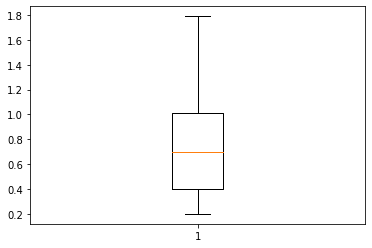

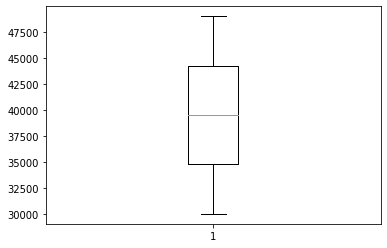

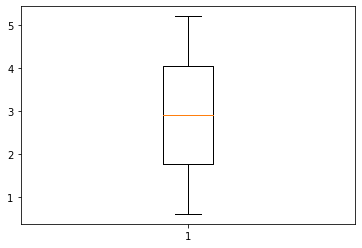

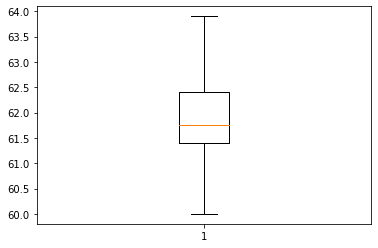

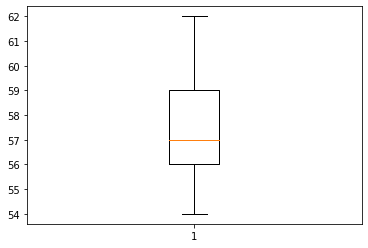

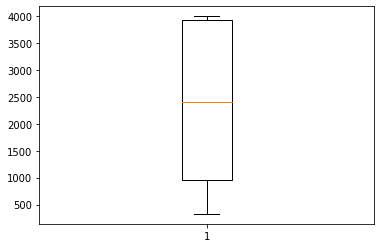

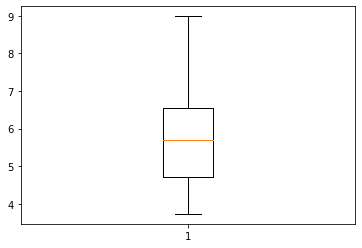

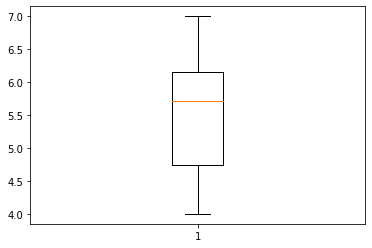

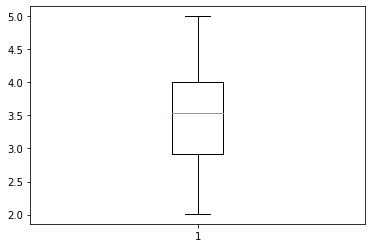

In [ ]:
#handling outliers with conditional statments

mean=df[num_cols].mean()

df['carat']=np.where(df['carat']>=1.8,mean[0],df['carat'])
df['depth']=np.where((df['depth']>63.9) | (df['depth']<60),mean[3],df['depth'])
df['table']=np.where((df['table']>62) | (df['table']<54),mean[4],df['table'])
df['price']=np.where((df['price']>4000) & (df['price']>100),mean[5],df['price'])
df['x']=np.where((df['x']>9) | (df['x']<2),mean[6],df['x'])
df['y']=np.where((df['y']>7) | (df['y']<4),mean[7],df['y'])
df['z']=np.where((df['z']>5) | (df['z']<2),mean[8],df['z'])

for i in num_cols:
    plt.boxplot(df[i])
    plt.show()

**Key Statistics**

In [ ]:
#Key statistics

df_numerical=num_cols

#Mean
mean=df[df_numerical].mean()
display(mean)

#Median
median=df[df_numerical].median()
display(median)

#Mode
cat_cols=['cut','color','clarity']
mode=df[cat_cols].mode()
display(mode)

#min and max
min_values=df[df_numerical].min()
max_values=df[df_numerical].max()
display(min_values)
display(max_values)

#quartiles

display(df[num_cols].quantile(0.25))
display(df[num_cols].quantile(0.50))
display(df[num_cols].quantile(0.75))


#counts
print(df.nunique())


#standard deviation
deviation=df[df_numerical].std()
display(deviation)

carat                                      0.741272
average us salary                      39506.756430
number of diamonds mined (millions)        2.901581
depth                                     61.876647
table                                     57.375321
price                                   2414.448805
x                                          5.727417
y                                          5.492144
z                                          3.495058
dtype: float64

carat                                      0.700000
average us salary                      39528.000000
number of diamonds mined (millions)        2.910000
depth                                     61.750222
table                                     57.000000
price                                   2398.000000
x                                          5.700000
y                                          5.720000
z                                          3.530000
dtype: float64

,cut,color,clarity
0,IDEAL,G,SI1


carat                                      0.20
average us salary                      30000.00
number of diamonds mined (millions)        0.60
depth                                     60.00
table                                     54.00
price                                    326.00
x                                          3.73
y                                          4.00
z                                          2.01
dtype: float64

carat                                      1.79
average us salary                      48999.00
number of diamonds mined (millions)        5.20
depth                                     63.90
table                                     62.00
price                                   4000.00
x                                          8.99
y                                          7.00
z                                          5.00
dtype: float64

carat                                      0.40
average us salary                      34761.00
number of diamonds mined (millions)        1.75
depth                                     61.40
table                                     56.00
price                                    949.00
x                                          4.71
y                                          4.74
z                                          2.91
Name: 0.25, dtype: float64

carat                                      0.700000
average us salary                      39528.000000
number of diamonds mined (millions)        2.910000
depth                                     61.750222
table                                     57.000000
price                                   2398.000000
x                                          5.700000
y                                          5.720000
z                                          3.530000
Name: 0.5, dtype: float64

carat                                      1.010000
average us salary                      44229.000000
number of diamonds mined (millions)        4.050000
depth                                     62.400000
table                                     59.000000
price                                   3928.816447
x                                          6.540000
y                                          6.160000
z                                          4.010000
Name: 0.75, dtype: float64

carat                                    395
cut                                        5
color                                      7
clarity                                    8
average us salary                      17613
number of diamonds mined (millions)      461
depth                                    144
table                                    117
price                                   3562
x                                        963
y                                        545
z                                        600
dtype: int64


carat                                     0.380610
average us salary                      5485.550030
number of diamonds mined (millions)       1.326515
depth                                     0.827981
table                                     1.898587
price                                  1381.784607
x                                         1.113207
y                                         0.808487
z                                         0.635378
dtype: float64

**visualization graphs**

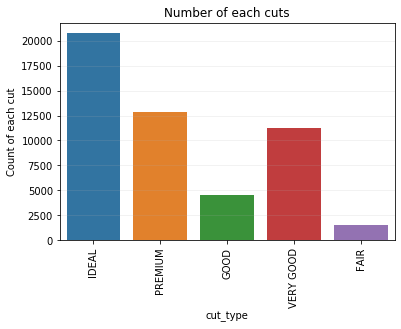

In [ ]:
#plot 1
sns.countplot(x='cut', data=df)
plt.xlabel('cut_type')
plt.xticks(rotation=90)
plt.ylabel('Count of each cut')
plt.title('Number of each cuts')
plt.grid(axis='y',alpha=0.2)
plt.show()

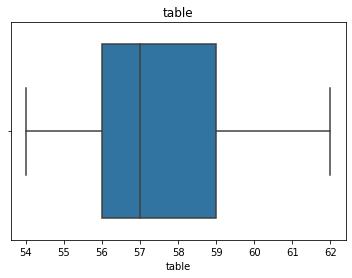

In [ ]:
#plot 2
sns.boxplot(x='table', data=df)
plt.xlabel('table')
plt.title('table')
plt.show()

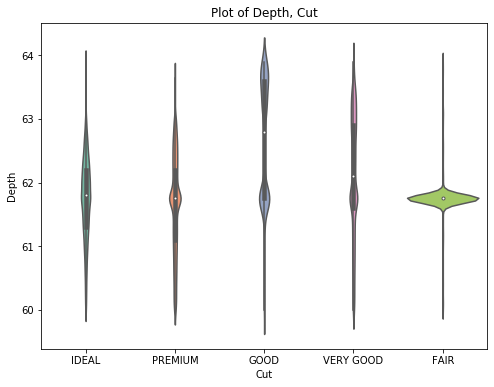

In [ ]:
#plot 3
plt.figure(figsize=(8, 6))
sns.violinplot(x='cut', y='depth', data=df, palette='Set2')
plt.xlabel('Cut')
plt.ylabel('Depth')
plt.title('Plot of Depth, Cut')
plt.show()

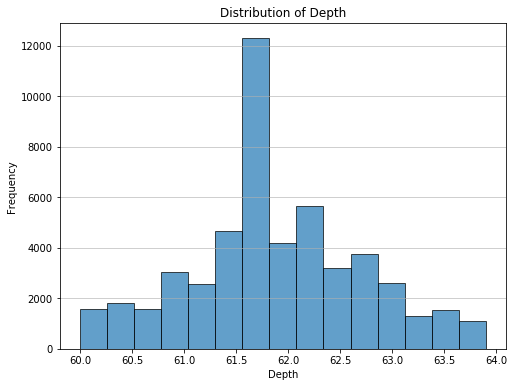

In [ ]:
#plot 4
plt.figure(figsize=(8, 6))
plt.hist(df['depth'], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Depth')
plt.grid(axis='y', alpha=0.75)
plt.show()

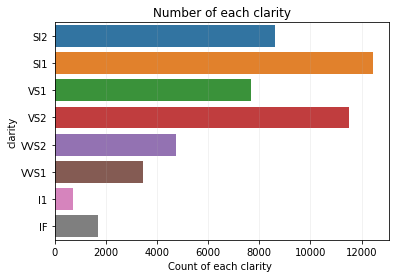

In [ ]:
sns.countplot(y='clarity', data=df)
plt.ylabel('clarity')
plt.grid(axis='x',alpha=0.2)
plt.xlabel('Count of each clarity ')
plt.title('Number of each clarity')
plt.show()

**corelation matrix**

                                        carat  average us salary  \
carat                                1.000000           0.005387   
average us salary                    0.005387           1.000000   
number of diamonds mined (millions) -0.004974          -0.000162   
depth                                0.036328          -0.000557   
table                                0.171174           0.000903   
price                                0.891388           0.002020   
x                                    0.887121           0.005571   
y                                    0.799114          -0.000840   
z                                    0.948609           0.003664   

                                     number of diamonds mined (millions)  \
carat                                                          -0.004974   
average us salary                                              -0.000162   
number of diamonds mined (millions)                             1.000000   
depth          

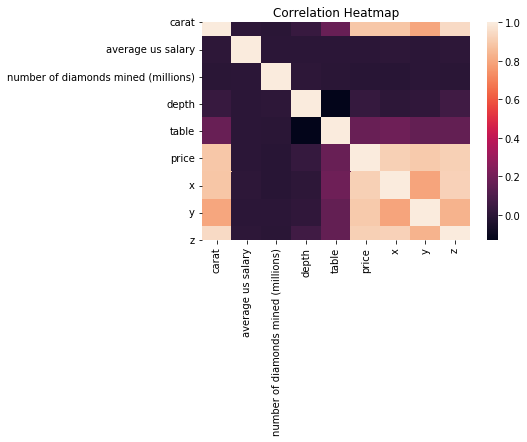

In [ ]:
#Finding correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr=df.corr()
print(corr)

sns.heatmap(corr)
plt.title('Correlation Heatmap')
plt.show()

#after checking the correlation we oberseve that number of diamonds mined (millions),average us salary ,
#number of diamonds mined (millions) abd depth have low correlation with carat which is our target variable.

**Convert features with string datatype to categorical using Onehotencoding**

In [ ]:
df=pd.get_dummies(df, columns = ['cut','color','clarity'])

**Normalization**

In [ ]:
n_col= ["average us salary","number of diamonds mined (millions)","depth","table","price","x","y","z"]
for val in n_col:
    min_val=df[val].min()
    max_val=df[val].max()
    df[val]=(df[val]-min_val)/(max_val-min_val)

In [ ]:
df= df.drop(["average us salary","number of diamonds mined (millions)"], axis=1)

## Ridge Regression


Mean Squared Error: 0.00348234052407501


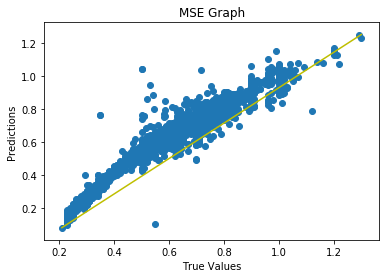

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class Ridgeregression():
    def __init__(self, lamda=3):
        self.lamda = lamda
        self.weights = None

    def fit(self,  X_train, y_train):
        self.weights = np.linalg.inv(X_train.T @ X_train + self.lamda*(np.identity(X_train.shape[1]))) @ X_train.T @ y_train

    def predict(self, X_test):
        return np.dot(X_test, self.weights)

    def mse(self, y_pred_ridge, Y_test):
        return np.mean((y_pred_ridge - Y_test)**2)


X = df.drop(columns=['carat'])
Y = df['carat']

train_test_split = 0.8

train_length = int(train_test_split * len(df))

X_train = X[:train_length]
Y_train = Y[:train_length]
X_test = X[train_length:]
Y_test = Y[train_length:]

Ridgemodel = Ridgeregression(lamda=0.1)
Ridgemodel.fit(X_train, Y_train)

y_pred_ridge = Ridgemodel.predict(X_test)

mse = Ridgemodel.mse(y_pred_ridge, Y_test)
print("Mean Squared Error:" ,mse)

plt.scatter(Y_test, y_pred_ridge)
plt.plot([min(Y_test), max(Y_test)], [min(y_pred_ridge), max(y_pred_ridge)], '-y')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("MSE Graph")
plt.show()

In [ ]:
file_path = "/Users/adarshreddy/Desktop/Assignments/ML/adarshre_dharmaac_assignment1_final/adarshre_dharmac_assignment1_part4.pickle"
weights_model_ridge=Ridgemodel.weights

with open(file_path, 'wb') as file:
    pickle.dump(weights_model_ridge, file)

**References**
#https://seaborn.pydata.org/
#https://numpy.org/doc/stable/reference/arrays.html